# CAD Laboratory (CE4P001) - Assignment No. 2


**Name:** Amiya Das  <br>
**Roll No.:** 22CE01057 <br>

<h3>Question-3</h3>

Given the two-dimensional body

<div style="margin-left: 40px">

$\mathcal{B}=\{(X_{1},X_{2})|0.1<X_{1}<1, 0.1<X_{2}<1\}$,

and the displacement field

$u_{r}=u\cdot e_{r}=0.2 \exp X_{1}$,  
$u_{\theta}=u\cdot e_{\theta}=0.2 \ln(1+X_{1}+X_{2})$.

</div>

Plot the displaced shape of the body using Julia.

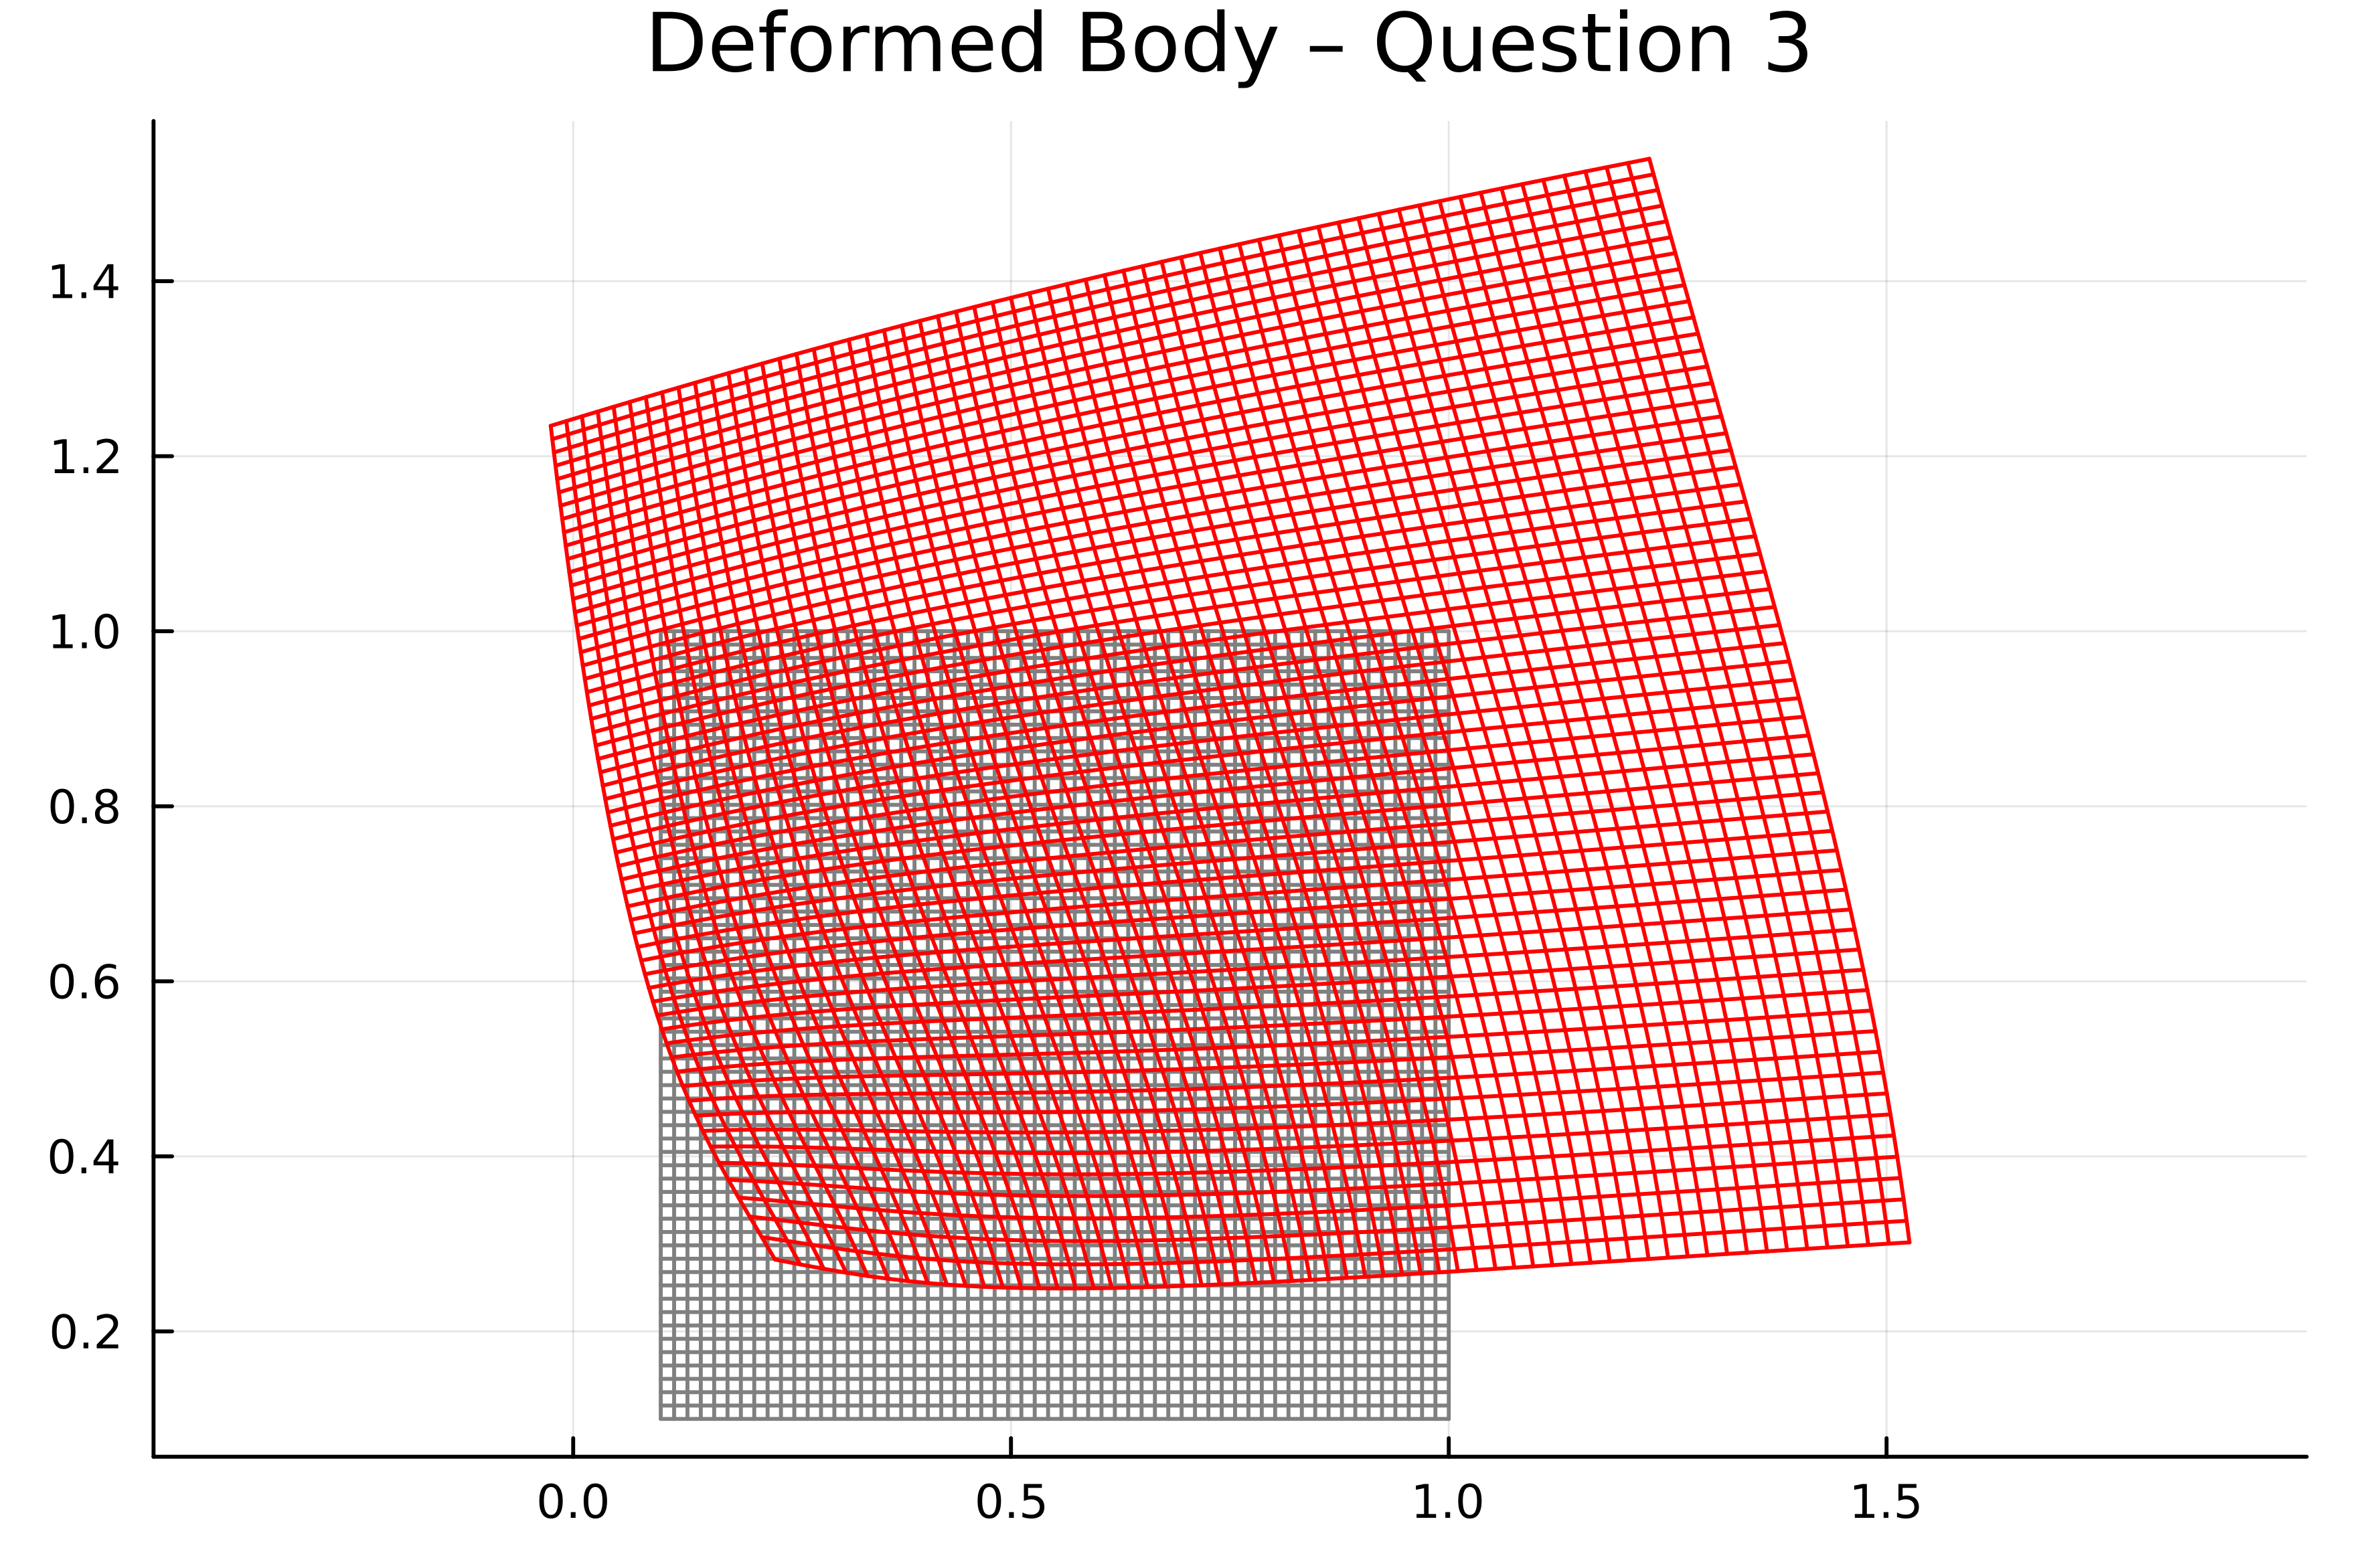

In [ ]:
using Plots


# Geometry bounds
X1_vals = range(0.1, 1, length=60)
X2_vals = range(0.1, 1, length=60)


# Storage
undef_x = []
undef_y = []
def_x   = []
def_y   = []


# Displacement field:
# u_r = 0.2 exp(X1)
# u_θ = 0.2 ln(1 + X1 + X2)

# Convert to Cartesian:
# u = u_r e_r + u_θ e_θ

function displacement_cartesian(X1, X2)
    θ  = atan(X2, X1)
    ur = 0.2 * exp(X1)
    uθ = 0.2 * log(1 + X1 + X2)

    # polar basis
    er  = (cos(θ), sin(θ))
    eθ  = (-sin(θ), cos(θ))

    ux = ur*er[1] + uθ*eθ[1]
    uy = ur*er[2] + uθ*eθ[2]

    return ux, uy
end


# Create characteristic mesh:
# lines of constant X1 and constant X2

# Constant X1 lines
for X1 in X1_vals
    X = Float64[]
    Y = Float64[]
    Xd = Float64[]
    Yd = Float64[]

    for X2 in X2_vals
        push!(X, X1)
        push!(Y, X2)

        ux, uy = displacement_cartesian(X1, X2)
        push!(Xd, X1 + ux)
        push!(Yd, X2 + uy)
    end

    push!(undef_x, X);  push!(undef_y, Y)
    push!(def_x,   Xd); push!(def_y,   Yd)
end

# Constant X2 lines
for X2 in X2_vals
    X = Float64[]
    Y = Float64[]
    Xd = Float64[]
    Yd = Float64[]

    for X1 in X1_vals
        push!(X, X1)
        push!(Y, X2)

        ux, uy = displacement_cartesian(X1, X2)
        push!(Xd, X1 + ux)
        push!(Yd, X2 + uy)
    end

    push!(undef_x, X);  push!(undef_y, Y)
    push!(def_x,   Xd); push!(def_y,   Yd)
end



# Plot both undeformed (gray) and deformed (red)
plot(aspect_ratio=1, legend=false, linewidth=1.2,
     title="Deformed Body – Question 3")
# undeformed mesh
for i in eachindex(undef_x)
    plot!(undef_x[i], undef_y[i], color=:gray)
end
# deformed mesh
for i in eachindex(def_x)
    plot!(def_x[i], def_y[i], color=:red)
end


savefig("Deformation_3.png")
display(current())
